In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings(action = 'ignore')

In [4]:
from google.colab import files
uploaded = files.upload()


Saving Churn_Modelling.csv to Churn_Modelling.csv


In [5]:
import io
data= pd.read_csv(io.BytesIO(uploaded['Churn_Modelling.csv']))

In [6]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
data.select_dtypes(include=['int64','float64','Int64']).dtypes

RowNumber            int64
CustomerId           int64
CreditScore          int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
data.groupby(['Surname']).agg({'RowNumber':'count', 'Exited':'mean'}
                                  ).reset_index().sort_values(by='RowNumber', ascending=False).head()

,Surname,RowNumber,Exited
2473,Smith,32,0.281250
1689,Martin,29,0.310345
2389,Scott,29,0.103448
2751,Walker,28,0.142857
336,Brown,26,0.192308


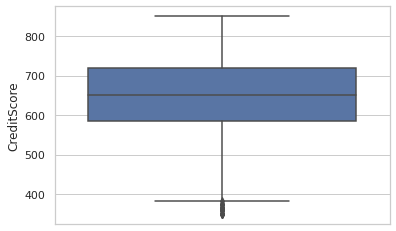

In [9]:
#univariate analysis
sns.set(style="whitegrid")
sns.boxplot(y=data['CreditScore'])

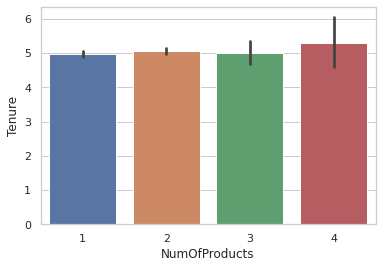

In [10]:
sns.barplot(x=data.NumOfProducts,y=data.Tenure)

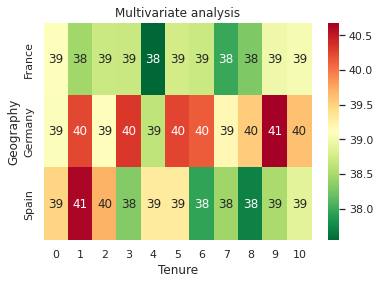

In [11]:
#multivariate
result = pd.pivot_table(data=data, index='Geography', columns='Tenure',values='Age')
sns.heatmap(result, annot=True, cmap = 'RdYlGn_r').set_title('Multivariate analysis')
plt.show()

In [12]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
data.describe(include=['object'])

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [14]:
data['Age'].mode()

0    37
dtype: int64

In [15]:
data["Age"].mean()


38.9218

In [16]:
m=round(data["Age"].mean())

In [17]:
data["Age"].median()

37.0

In [18]:
s=round(data['Age'].std())
print(s)

10


In [19]:
#check missing values
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [20]:
#Find the outliers and replace the outlier
CreditScores = data['CreditScore']
CreditScores

0       619
1       608
2       502
3       699
4       850
       ... 
9995    771
9996    516
9997    709
9998    772
9999    792
Name: CreditScore, Length: 10000, dtype: int64

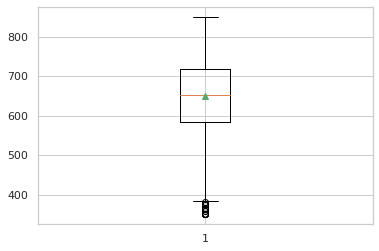

In [21]:
import matplotlib.pyplot as plt
plt.boxplot(data['CreditScore'],showmeans = True)
plt.show()

In [22]:
df = data[data['CreditScore'] >= 378]
for i in data['CreditScore']:
    if(i<378):
        print(i)
print(data['CreditScore'])

376
376
363
359
350
350
358
351
365
367
350
350
373
350
0       619
1       608
2       502
3       699
4       850
       ... 
9995    771
9996    516
9997    709
9998    772
9999    792
Name: CreditScore, Length: 10000, dtype: int64


In [23]:
b = data['Balance']
b

0            0.00
1        83807.86
2       159660.80
3            0.00
4       125510.82
          ...    
9995         0.00
9996     57369.61
9997         0.00
9998     75075.31
9999    130142.79
Name: Balance, Length: 10000, dtype: float64

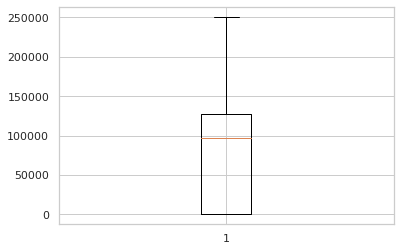

In [24]:
plt.boxplot(b)
plt.show()

In [25]:
e= df['EstimatedSalary']
e

0       101348.88
1       112542.58
2       113931.57
3        93826.63
4        79084.10
          ...    
9995     96270.64
9996    101699.77
9997     42085.58
9998     92888.52
9999     38190.78
Name: EstimatedSalary, Length: 9986, dtype: float64

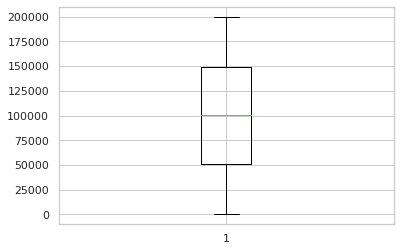

In [26]:
plt.boxplot(e) 
plt.show()

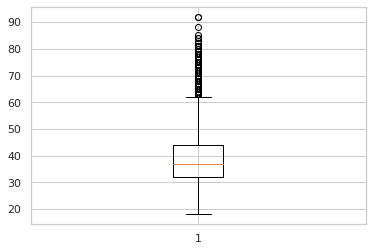

In [27]:
a = data['Age']
plt.boxplot(a)
plt.show()

In [28]:
ageOutliers =  np.where(df['Age'] > 60)
ageOutliers

(array([  41,   43,   57,   84,  103,  157,  180,  229,  233,  242,  251,
         275,  309,  363,  370,  384,  386,  398,  415,  483,  537,  558,
         560,  566,  601,  611,  616,  629,  657,  677,  695,  735,  765,
         768,  806,  810,  822,  858,  883,  887,  920,  927,  946,  950,
         955,  961,  967,  995, 1007, 1037, 1038, 1053, 1112, 1116, 1190,
        1202, 1231, 1232, 1243, 1249, 1275, 1282, 1325, 1339, 1384, 1403,
        1406, 1429, 1435, 1453, 1515, 1539, 1584, 1603, 1610, 1637, 1785,
        1805, 1852, 1860, 1895, 1898, 1901, 1927, 1974, 1989, 1995, 2005,
        2032, 2046, 2071, 2087, 2096, 2101, 2147, 2152, 2157, 2237, 2254,
        2267, 2291, 2294, 2426, 2431, 2451, 2452, 2511, 2512, 2525, 2533,
        2545, 2590, 2606, 2650, 2661, 2704, 2708, 2751, 2763, 2768, 2769,
        2772, 2782, 2846, 2868, 2892, 2899, 2916, 2917, 2999, 3024, 3045,
        3101, 3133, 3157, 3183, 3194, 3220, 3296, 3299, 3302, 3305, 3308,
        3337, 3357, 3359, 3369, 3373, 

In [29]:
da = data[data['Age'] <=60 ]
da

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [30]:
#Check for Categorical columns and perform encoding.
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [31]:
from pandas.api.types import is_string_dtype
continuous=[]
categorical=[]
for data1 in data:
    if is_string_dtype(data[data1]):
        categorical.append(data1)
    else:
        continuous.append(data1)
categorical

['Surname', 'Geography', 'Gender']

In [32]:
#Split the data into dependent and independent variables.
x = data.iloc[:, 0:1].values
y = data.iloc[:, 1]
print(x)
print(y)

[[    1]
 [    2]
 [    3]
 ...
 [ 9998]
 [ 9999]
 [10000]]
0       15634602
1       15647311
2       15619304
3       15701354
4       15737888
          ...   
9995    15606229
9996    15569892
9997    15584532
9998    15682355
9999    15628319
Name: CustomerId, Length: 10000, dtype: int64


In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x)
X_test = sc.transform(x)

In [34]:
#Split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(data,y,test_size=0.2)

In [35]:
print(X_train)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
2537       2538    15723706     Abbott          573    France  Female   33   
3428       3429    15570360        Wan          641    France  Female   35   
7550       7551    15801817  Carpenter          688    France  Female   38   
3536       3537    15748034  Drakeford          534    France    Male   29   
8307       8308    15626243   Chijioke          618    France    Male   30   
...         ...         ...        ...          ...       ...     ...  ...   
8518       8519    15677288      Geach          599    France    Male   50   
565         566    15811773       Hsia          543    France    Male   36   
3205       3206    15733973       Bibi          850    France  Female   42   
7785       7786    15750547       Bair          738    France    Male   26   
4816       4817    15582841    Butusov          600    France    Male   29   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

In [36]:
print(X_test)

      RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
7189       7190    15701885    Tucker          647    France  Female   40   
8025       8026    15571873      Sung          655    France    Male   24   
4220       4221    15711314       Kao          589     Spain  Female   45   
2093       2094    15806132    Martin          555    France    Male   55   
3689       3690    15790829    Gibson          703    France  Female   45   
...         ...         ...       ...          ...       ...     ...  ...   
286         287    15573112      Kang          602     Spain    Male   29   
296         297    15774510      Tien          714    France  Female   31   
3147       3148    15753102    Curtis          752     Spain    Male   44   
3004       3005    15706185  Clements          596   Germany    Male   47   
8975       8976    15763415      Gray          567   Germany    Male   41   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
7189  

In [37]:
print(y_train)

2537    15723706
3428    15570360
7550    15801817
3536    15748034
8307    15626243
          ...   
8518    15677288
565     15811773
3205    15733973
7785    15750547
4816    15582841
Name: CustomerId, Length: 8000, dtype: int64


In [38]:
print(y_test)

7189    15701885
8025    15571873
4220    15711314
2093    15806132
3689    15790829
          ...   
286     15573112
296     15774510
3147    15753102
3004    15706185
8975    15763415
Name: CustomerId, Length: 2000, dtype: int64
